In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [364]:
df=pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

In [365]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [366]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [367]:
df.duplicated().sum()

0

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [369]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [370]:
df.drop(['Id'],inplace=True,axis=1)

In [371]:
###df['sepal_area'] = df['SepalLengthCm'] * df['SepalWidthCm']

###df['petal_area'] = df['PetalLengthCm'] * df['PetalWidthCm']


In [372]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [373]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [374]:
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [375]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,6.7,3.1,4.7,1.5,1
31,5.4,3.4,1.5,0.4,0
140,6.7,3.1,5.6,2.4,2


In [376]:
df.shape

(150, 5)

In [377]:
 import seaborn as sns
import matplotlib.pyplot as plt

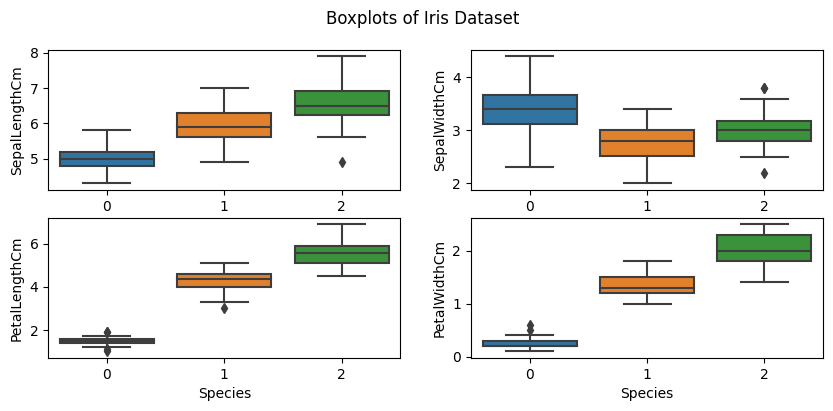

In [378]:
plt.figure(figsize=(10, 4))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="SepalLengthCm", data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="SepalWidthCm", data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="PetalWidthCm", data=df)
plt.suptitle("Boxplots of Iris Dataset")
plt.show()

In [379]:
###plt.subplot(2, 2, 1)
###sns.boxplot(x="Species", y="sepal_area", data=df)
###plt.subplot(2, 2, 2)
###sns.boxplot(x="Species", y="petal_area", data=df)
###plt.suptitle("Boxplots of Iris Dataset")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


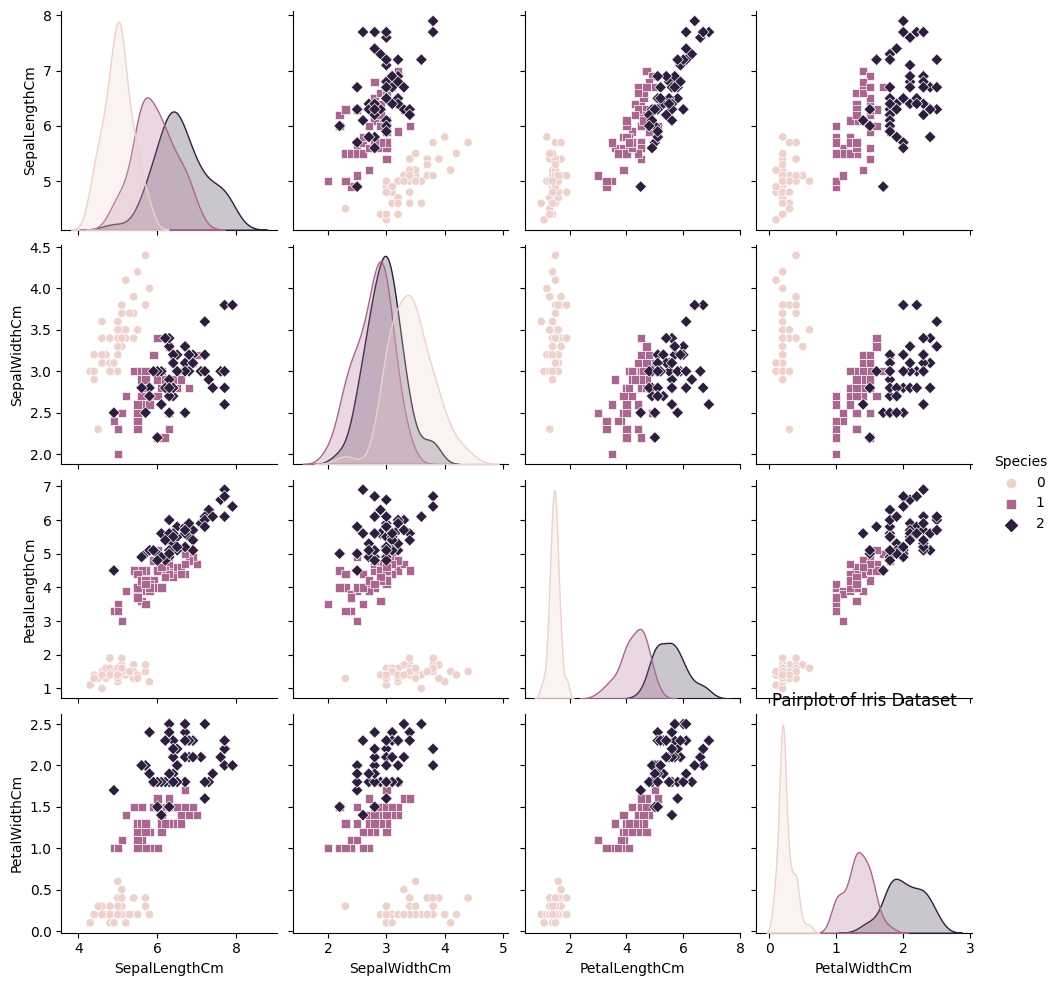

In [380]:
sns.pairplot(df, hue="Species", markers=["o", "s", "D"])
plt.title("Pairplot of Iris Dataset")
plt.show()


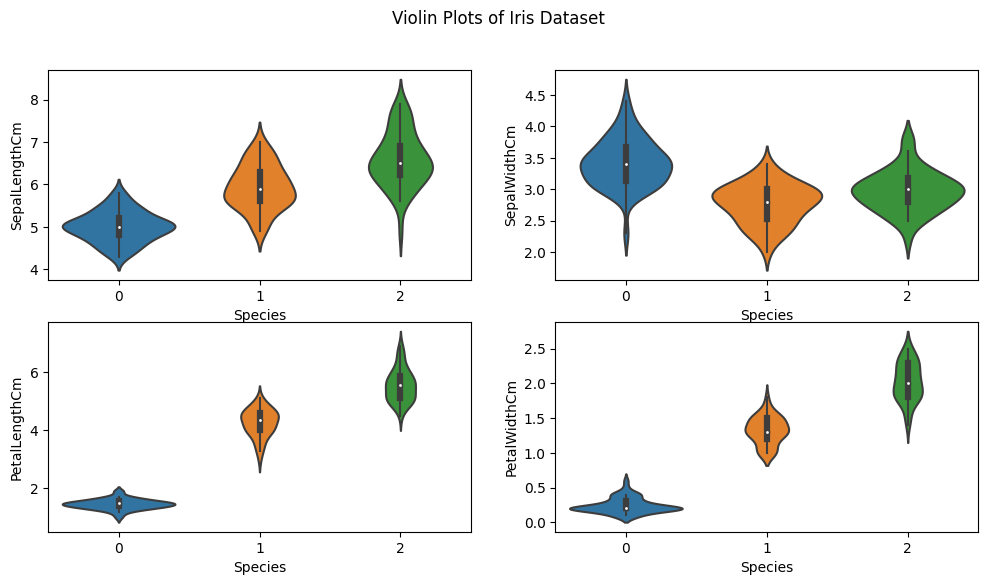

In [381]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", y="SepalLengthCm", data=df)
plt.subplot(2, 2, 2)
sns.violinplot(x="Species", y="SepalWidthCm", data=df)
plt.subplot(2, 2, 3)
sns.violinplot(x="Species", y="PetalLengthCm", data=df)
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="PetalWidthCm", data=df)
plt.suptitle("Violin Plots of Iris Dataset")
plt.show()

In [382]:
###plt.subplot(2, 2, 1)
###sns.violinplot(x="Species", y="sepal_area", data=df)
###plt.subplot(2, 2, 2)
###sns.violinplot(x="Species", y="petal_area", data=df)
###plt.suptitle("Violin Plots of Iris Dataset")

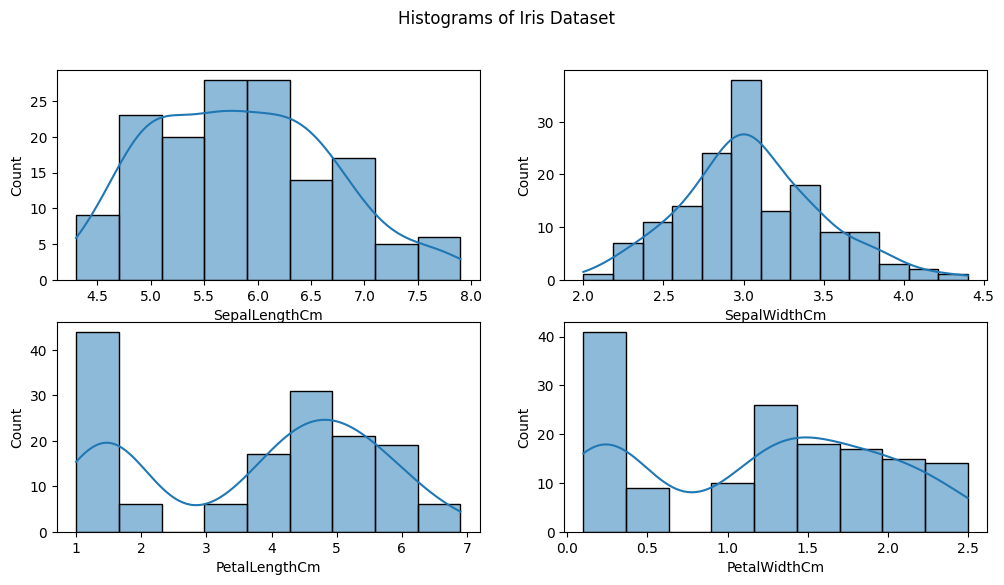

In [383]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="SepalLengthCm", kde=True)
plt.subplot(2, 2, 2)
sns.histplot(data=df, x="SepalWidthCm", kde=True)
plt.subplot(2, 2, 3)
sns.histplot(data=df, x="PetalLengthCm", kde=True)
plt.subplot(2, 2, 4)
sns.histplot(data=df, x="PetalWidthCm", kde=True)
plt.suptitle("Histograms of Iris Dataset")
plt.show()

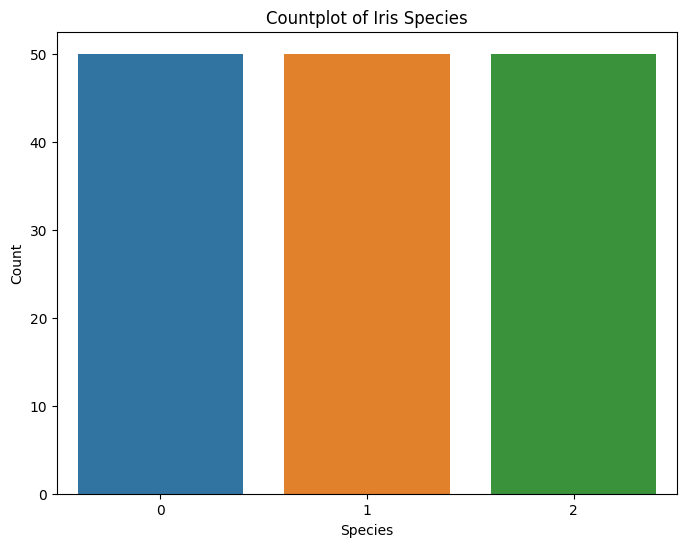

In [384]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Species")
plt.title("Countplot of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

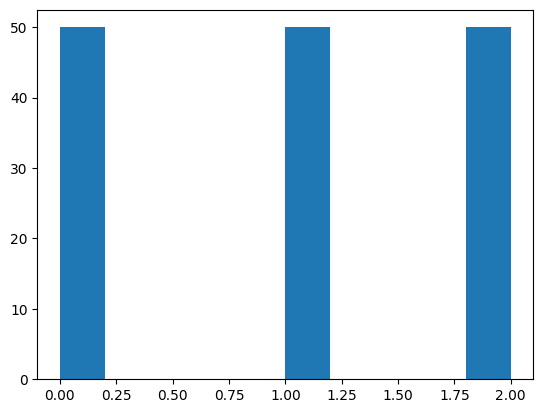

In [385]:
plt.hist(df['Species'])

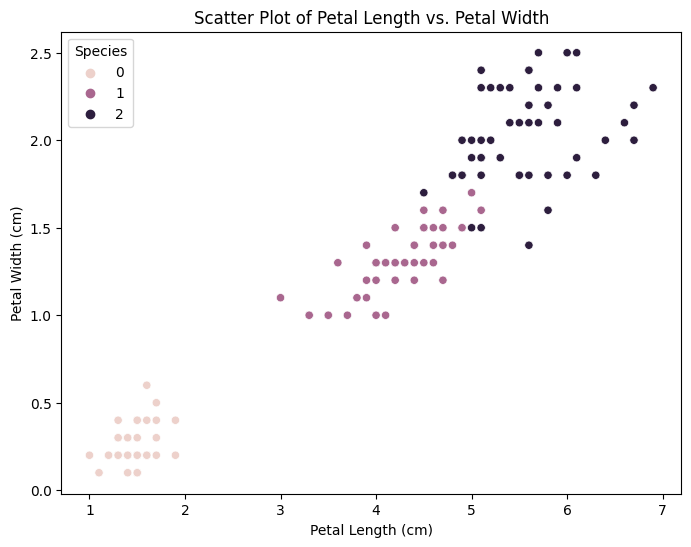

In [386]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
plt.title("Scatter Plot of Petal Length vs. Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


In [387]:
###plt.figure(figsize=(8, 6))
###sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
###plt.title("Scatter Plot of Petal Length vs. Petal Width")
###plt.xlabel("Petal Length (cm)")
###plt.ylabel("Petal Width (cm)")
###plt.show()


In [388]:
######plt.figure(figsize=(8, 6))
###sns.scatterplot(data=df, x="sepal_area", y="petal_area", hue="Species")
###plt.title("Scatter Plot of Petal Length vs. Petal Width")
###plt.xlabel("sepal area (cm)")
###plt.ylabel("petal area (cm)")
###plt.show()


([<matplotlib.patches.Wedge at 0x7e237af332b0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Viginca'),
  Text(0.5500001486524352, -0.9526278583383436, 'Versicolor')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

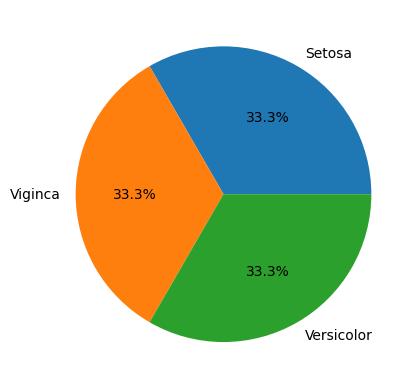

In [389]:
plt.pie(df['Species'].value_counts(),labels=['Setosa','Viginca','Versicolor'],autopct="%.1f%%")

In [390]:
x=df.drop(['Species'],axis=1).values
y=df['Species'].values

In [391]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [392]:
print(x_train.shape,x_test.shape)

(120, 4) (30, 4)


In [393]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [394]:
rfc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
xgb=XGBClassifier()
bc=BaggingClassifier()

In [395]:
rfc.fit(x_train,y_train)
svc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
xgb.fit(x_train,y_train)
bc.fit(x_train,y_train)

BaggingClassifier()

In [396]:
rfc_pred=rfc.predict(x_test)
svc_pred=svc.predict(x_test)
dtc_pred=dtc.predict(x_test)
xgb_pred=xgb.predict(x_test)
bc_pred=bc.predict(x_test)

In [397]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score

In [398]:
print(f'RFC',accuracy_score(y_test,rfc_pred),precision_score(y_test,rfc_pred,average='weighted'))
print(f'SVC',accuracy_score(y_test,rfc_pred),precision_score(y_test,svc_pred,average='weighted'))
print(f'DTC',accuracy_score(y_test,rfc_pred),precision_score(y_test,dtc_pred,average='weighted'))
print(f'XGB',accuracy_score(y_test,rfc_pred),precision_score(y_test,xgb_pred,average='weighted'))
print(f'BC',accuracy_score(y_test,rfc_pred),precision_score(y_test,bc_pred,average='weighted'))

RFC 0.9666666666666667 0.9708333333333333
SVC 0.9666666666666667 0.9708333333333333
DTC 0.9666666666666667 0.9708333333333333
XGB 0.9666666666666667 0.9708333333333333
BC 0.9666666666666667 0.9708333333333333


In [399]:
confusion_matrix(y_test,rfc_pred)

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]])

In [400]:
from sklearn.metrics import classification_report

In [401]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [402]:
values=np.array([2.2,1.6,1.1,1.5])
values=np.expand_dims(values,axis=0)

In [403]:
pred=rfc.predict(values)

In [404]:
if pred==0:
    print('Setose')
elif pred==1:
    print('Versicolor')
else:
    print('Virginica')

Versicolor
